# Limpieza y Análisis de Datos - Semana 3

In [189]:
# Importamos las librerias necesarias 
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de datos

In [190]:
df = pd.read_excel("Merged_2.xlsx")

## Limpieza de Datos

In [191]:
# Remove unamed columns
df.drop(df.columns[df.columns.str.contains(
    'unnamed', case=False)], axis=1, inplace=True)
# Remove rows only if they have entire missing values
df.dropna(axis='index', how='all')
# ----- Limpiaremos Vehicle Type y Divering Company principalmente ----

# Quitar las dobles comillas de los valores
df['Divering Company'] = df['Divering Company'].replace('\"', '')
df['Vehicle Type'] = df['Vehicle Type'].replace('\"', '')

# Quitar valores no ascii
df = df.applymap(lambda x: x.encode('ascii', 'ignore').decode('ascii') if isinstance(x, str) else x)

# Quitar valores N/A
# Definimos una lista con valores que deseamos quitar
values = ["N/A", "No name"]
# Aqui quitamos filas que contengan los valores en la lista para las columnas que especifiquemos
df = df[df['Vehicle Type'].isin(values) == False]
df = df[df['Divering Company'].isin(values) == False]

# --- TODAVIA HAY REGISTROS QUE TIENEN nan COMO VALOR ---

# Asegurarse que todos empiezan con Letra Mayuscula
df['Vehicle Type'] = df['Vehicle Type'].str.title()
df['Divering Company'] = df['Divering Company'].str.title()

# Valores similares como Coca Cola y Coca-Cola deben ser iguales
valores_correctos_empresas = {
    "Coca-Cola": ["CocaCola", "Cocacola", "Coke", "Coca", "Coca cola"], 
    "DHL": ["Dhl", "dhl"], 
    "Agar Latino": ["Agar", "Agar latino"], 
    "Unknown" : ["unknown", "Unknow", "Unkwown", "Unkown", "Unkonwn", "Uknown"], 
    "Anvi Distribuciones" : ["Anvi"],
    "Correos" : ["Correios"], 
    "Don Pin" : ["DonPin", "Don pin"], 
    "UPS" : ["Ups"], 
    "Fiesta" : ["Firesta"],
    "Sedex Correos" : ["Sedex correios"],
    "Heineken": ["Heinegen"], 
    "Telaga Biru" : ["Telaga", "Telaga biru"], 
    "U.S. Foods" : ["Us foods", "U.S Foods", "U.S foods", "US Foods"],
    "YTO Express" : ["YTOEXPRESS", "Yto express", "Ytoexpress", "YtoExpress", "Yto Express"],
}

valores_correctos_vehiculos = {
    "Truck": ["Articulated truck", "Big truck", "Rigid truck", "Pickup truck", "Turck", "Rigid", "Articulated Truck", "Big Truck", "Rigid Truck", "Pickup Truck"],
    "Bicycle" : ["Bike" ], 
    "Motorcycle" : ["Motorbike"], 
    "Van" : [" van", "Van ", " Man", "man", "Man", " Van"],
    "Dolly": ["dolly", "Dolly "]
}

for k, v in valores_correctos_empresas.items():
    df.loc[df['Divering Company'].isin(v), 'Divering Company'] = k

for k, v in valores_correctos_vehiculos.items():
    df.loc[df['Vehicle Type'].isin(v), 'Vehicle Type'] = k

print(df['Divering Company'].unique().tolist())
print(df['Vehicle Type'].unique().tolist())
print(f"Len of Companies before cleaning: {len(df['Divering Company'].unique().tolist())}")
print(f"Len of Vehicles before cleaning: {len(df['Vehicle Type'].unique().tolist())}")


['New Space', 'Colortel', 'Unknown', 'Pullman', 'Correos', 'Piquetur Log', 'Brico', 'Vigor', 'Proactiva', 'Famiglia Fertucilli', 'Guaran', 'Coca-Cola', 'Antarctica', 'Budweiser', 'Famiglia Francello', 'Blue Angels', 'Cocacda', 'Aurora', 'Pepsilo', 'Fazenda', 'Acqua Vip', 'Suzuki', 'DHL', 'Nestle', 'Control Express', 'Jamef', 'Po De Acar', 'Titan Express', 'Nivaboy Express', 'Extra', 'Emprio Beraldin', 'Ravage Express', 'Brasileira Express', 'Mega Express', 'Maqgel', 'Personal Service', "Silva'S Hortifruti", 'Sedex Correios', 'Souza Cruz', 'Supernova', 'Trans Tour', 'Vinhais', 'Castropil', 'Trans Magna', 'America Delivery', 'Acert Express', 'Napolitano', 'Campeo Paulista', 'UPS', 'Tramax', 'Antilhas', 'Aroumar', 'Ceratti', 'Q', 'Marcas De Espaa', 'Santa Luiza', 'Pacer Logstica', 'Transminato', 'Fedex', 'Gigio', 'Mundancia Carreto', 'Caf Toledo', 'Tasca', 'Wan-San', 'Daytona Express', 'Embalagens Trinca', nan, 'City Freight', 'Cnex', 'Cctv', 'China Post', 'Best Express', 'Ycil', 'YTO Exp

## --- Viajes ---
#### Preguntas h, j, t

## --- Ciudades ---
#### Preguntas o-s, f

## --- Tiendas ---
#### Preguntas l - s

## --- Vehiculos --- 
#### Preguntas a - e, g, i, k

Tipos de vehiculos: 17


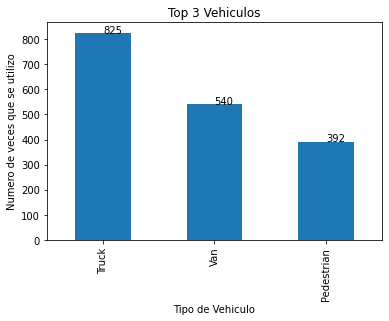

In [192]:
# Pregunta a) Tipos de vehiculos
cantidadVehiculos = len(df['Vehicle Type'].unique().tolist())
print(f"Tipos de vehiculos: {cantidadVehiculos}")
# Pregunta b) Top 3 de vehiculos
plt.title("Top 3 Vehiculos")
plt.xlabel("Tipo de Vehiculo")
plt.ylabel("Numero de veces que se utilizo")
df["Vehicle Type"].value_counts().head(3).plot(kind="bar")
for i, v in enumerate(df["Vehicle Type"].value_counts().head(3).index):
    plt.text(i, df["Vehicle Type"].value_counts().head(3).values[i], df["Vehicle Type"].value_counts().head(3).values[i])

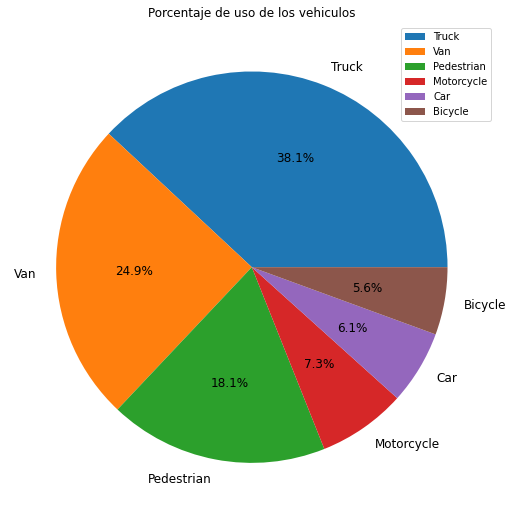

In [230]:
# Pregunta c) Porcentaje de uso de vehiculos
# Graficamos solo vehiculos que se hayan utilizado mas de 10 veces para que se vea bien
plt.title("Porcentaje de uso de los vehiculos")
df["Vehicle Type"].value_counts()[df["Vehicle Type"].value_counts() > 20].plot(
    kind="pie", autopct="%1.1f%%", figsize=(9, 9), fontsize=12, label="").legend(loc="upper right")



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


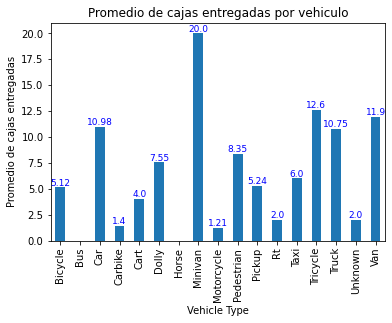

In [194]:
# Pregunta d) Promedio de cajas entregadas por vehiculo
plt.title("Promedio de cajas entregadas por vehiculo")
plt.xlabel("Tipo de Vehiculo")
plt.ylabel("Promedio de cajas entregadas")
df.groupby("Vehicle Type")["Boxes Delivered"].mean().plot(kind="bar" )
for i, v in enumerate(df.groupby("Vehicle Type")["Boxes Delivered"]):
    plt.text(i, df.groupby("Vehicle Type")["Boxes Delivered"].mean().values[i], round(df.groupby("Vehicle Type")["Boxes Delivered"].mean().values[i], 2), color="blue", horizontalalignment="center", verticalalignment="bottom", rotation=0, size=9, family="sans-serif")

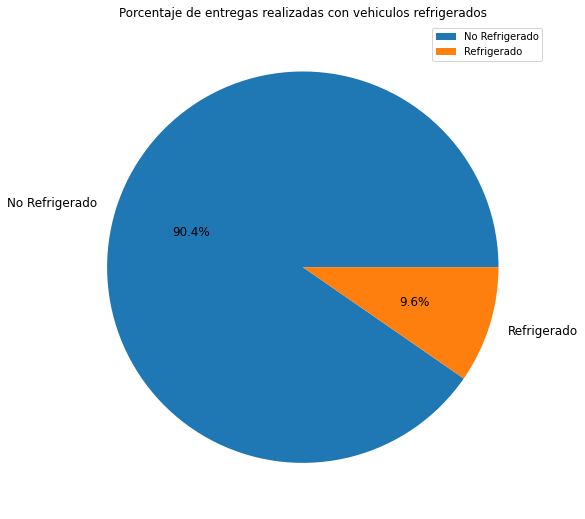

In [234]:
# Pregunta e) Porcentaje de entregas realizadas con vehiculos refrigerados
df["Refrigerated Vehicle"] = df["Refrigerated Vehicle"].replace(
    0, "No Refrigerado")
df["Refrigerated Vehicle"] = df["Refrigerated Vehicle"].replace(
    1, "Refrigerado")
plt.title("Porcentaje de entregas realizadas con vehiculos refrigerados")
df["Refrigerated Vehicle"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(9, 9), fontsize=12, label=" ").legend(loc="upper right")


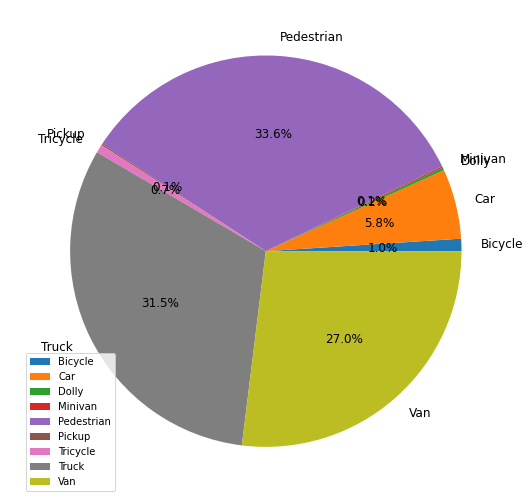

In [253]:
# Pregunta g) Porcentaje de entregas realizadas con equipo por tipo de vehiculo
df["Equipment"] = df["Equipment"].replace(
    0, "No")
df["Equipment"] = df["Equipment"].replace(
    1, "Si")
df.loc[df["Equipment"] == "Si"].groupby("Vehicle Type")["KM2 ID"].count().plot(kind="pie", autopct='%1.1f%%', figsize=(9, 9), fontsize=12, label=" ").legend(loc="lower left")


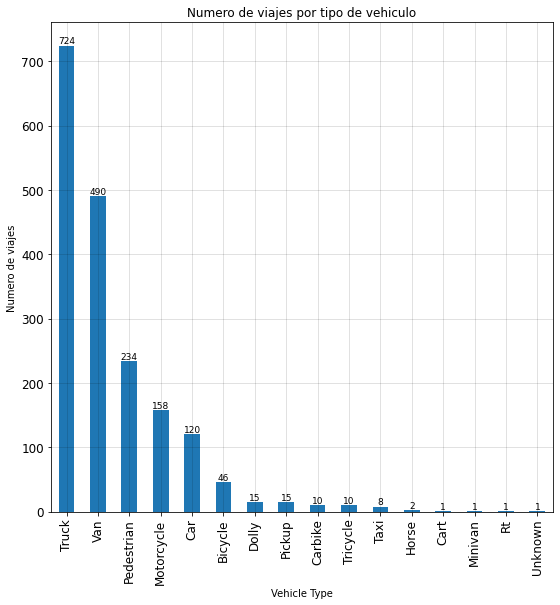

In [269]:
# Pregunta i) Numero de viajes por tipo de vehiculo
# Quitar los valores 0 para no inventar datos y los valores que vengan vacios
df.drop(df[df["Number of Trips"] == 0].index, inplace=True)
df.dropna(subset=["Number of Trips"], inplace=True)
df.drop(df[df["Number of Trips"] == ""].index, inplace=True)
df.drop(df[df["Number of Trips"] == " "].index, inplace=True)
plt.title("Numero de viajes por tipo de vehiculo")
plt.xlabel("Tipo de Vehiculo")
plt.ylabel("Numero de viajes")
df.groupby("Vehicle Type")["Number of Trips"].count().sort_values(ascending=False).plot(kind="bar", figsize=(9, 9), fontsize=12, label=" ").grid(True, which="major", color="black", alpha=0.15, linestyle="-")
for i, v in enumerate(df.groupby("Vehicle Type")["Number of Trips"].count().sort_values(ascending=False).index):
    plt.text( i, df.groupby("Vehicle Type")["Number of Trips"].count().sort_values(ascending=False).values[i], df.groupby("Vehicle Type")["Number of Trips"].count().sort_values(ascending=False).values[i], color="black", horizontalalignment="center", verticalalignment="bottom", rotation=0, size=9, family="sans-serif")

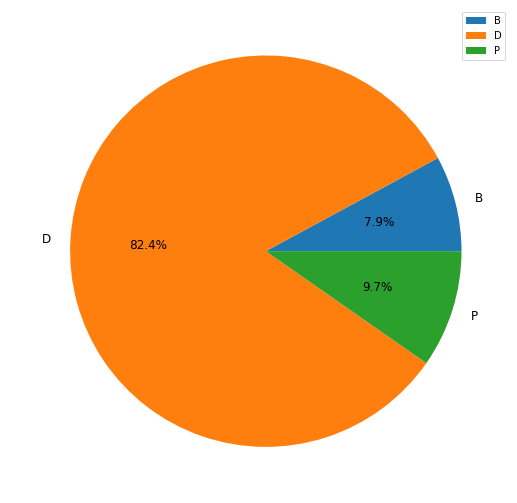

In [272]:
# Pregunta k) Tipo de vehiculos de entrega
plt.title("Tipo de vehiculos de entrega")
df.groupby("Delivery Type")["KM2 ID"].count().plot(kind="pie", autopct='%1.1f%%', figsize=(9, 9), fontsize=12, label=" ").legend(loc="upper right")